In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c anaconda graphviz
import folium # map rendering library

print('Libraries imported.')


Solving environment: done

# All requested packages already installed.

Libraries imported.


Load Neighborhood dataset using Pandas package

In [4]:
# The code was removed by Watson Studio for sharing.

,Neighborhood,Community,ID,Neighborhood Abbreviation,Labor Force Participation Rate,Employment Rate,Private Employment Rate,Government Employment Rate,Self-Employment Rate,Median Income,Poverty Rate,Total Persons,Male Persons,Percent Male Persons,Female Persons,Percent Female Persons,Age < 24,Percent Age < 24,Age 25 to 44,Percent Age 25 to 44,Age 45 to 64,Percent Age 45 to 64,Age 65 >,Percent Age 65 >,White,Percent White,Black,Percent Black,Latinx,Percent Latinx,Asian,Percent Asian,Other,Percent Other,Total Occupancy Units,Occupied Units,Percent Occupied Units,Vacant Units,Percent Vacant Units,Other Vacant Units,Percent Other Vacant Units,Total Units in Structure,1 Unit Structure,Percent 1 Unit Structure,2 Unit Structure,Percent 2 Unit Structure,3 to 19 Unit Structure,Percent 3 to 19 Unit Structure,20 or More Unit Structure,Percent 20 or More Unit Structure,Built 2000-2015,Percent Built 2000-2015,Built 1970-1999,Percent Built 1970-1999,Built 1940-1969,Percent Built 1940-1969,Built Before 1940,Percent Built Before 1940,Owner Tenure,Percent Owner Tenure,Renter Tenure,Percent Renter Tenure,0 Available Vehicle,Percent 0 Available Vehicle,1 Available Vehicle,Percent 1 Available Vehicle,2 orMore Available Vehicle,Percent 2 or More Available Vehicle,Median Value for Cost-Burdened Owners,Total Cost Burdened Owners,30%+ Cost Burdened Owners,Share Cost Burdened Owners,Median Value for Rent-Burdened Renters,Total Rent Burdened Renters,30%+ Rent-Burdened Renters,Share Rent-Burdened Renters,Family Households,Percent Family Households,Family W/Children Households,Percent Family W/Children Households,Married Family W/Children Households,Percent Married Family W/ Children Households,Single Person Households,Percent Single Person Households,Foreign Born,Percent Foreign Born,< High School Education,Percent < High School Education,High School Education,Percent High School Education,Associates Education,Percent Associates Education,Bachelors Education,Percent Bachelors Education,Graduate Education,Percent Graduate Education,Total Households,Total Family Households W/ Children Under 18,Percent Family Households W/ Children Under 18,Total Married Couple Households W/ Children Under 18,Percent Married Couple Households W/ Children Under 18,Total Female Householder W/ Children Under 18,Percent Female Householder W/ Children Under 18,Total Male Householder W/ Children Under 18,Percent Male Householder W/ Children Under 18,Total Family Households W/Out Children Under 18,Percent Family Households W/Out Children Under 18,Total Married Couple W/Out Children Under 18,Percent Married Couple W/Out Children Under 18,Total Female Family Householder W/Out Children Under 18,Percent Female Family Householder W/Out Children Under 18,Total Male Family Householder W/Out Children Under 18,Percent Male Family Householder W/Out Children Under 18,Total Non-Family Households,Percent Non-Family Households,Total Living Alone,Percent Living Alone,Total Not Living Alone,Percent Not Living Alone,Total Living Alone Senior,Percent Living Alone Senior,Latitude,Longitude,New Georeferenced Column
0,Kensington-Bailey,East,16,KB,56.41,89.47,82.11,16.11,1.78,37240,30.88,14098,6250,44.33,7848,55.67,5682,40.30,3498,24.81,3395,24.08,1523,10.80,887,6.29,12373,87.76,206,1.46,253,1.79,379,2.69,6492,5674,87.40,818,12.60,599,9.23,6492,3594,55.36,2379,36.65,465,7.16,54,0.83,13,0.20,192,2.96,1460,22.49,4827,74.35,2568,45.26,3106,54.74,1583,27.90,2705,47.67,1386,24.43,55018.38006,2560,595,23.24,796.685547,2920,1692,57.95,3292,58.02,1545,27.23,320,5.64,2209,38.93,214.515676,3.78,893.304420,15.74,3385.118108,59.66,637.785646,11.24,340.466968,6.00,417.324857,7.36,5674,1545,27.23,320,20.71,1063,68.80,162,10.49,1747,30.79,690,39.50,842,48.20,215,12.31,2382,41.98,2209,92.74,173,7.26,565,23.72,42.939776,-78.809881,"(42.93977645, -78.80988103)"
1,Central,Central,1,CN,55.17,93.43,80.41,16.76,2.83,54390,19.52,3458,1928,55.75,1530,44.25,811,23.45,1328,38.40,858,24.81,461,13.33,1656,47.89,986,28.51,707,20.

Let's print the column names to know what columns exists in this dataset

In [5]:
col=Buf_df.columns

In [6]:
col[:60]

Index(['Neighborhood', 'Community', 'ID', 'Neighborhood Abbreviation',
       'Labor Force Participation Rate', 'Employment Rate',
       'Private Employment Rate', 'Government Employment Rate',
       'Self-Employment Rate', 'Median Income', 'Poverty Rate',
       'Total Persons', 'Male Persons', 'Percent Male Persons',
       'Female Persons', 'Percent Female Persons', 'Age < 24',
       'Percent Age < 24', 'Age 25 to 44', 'Percent Age 25 to 44',
       'Age 45 to 64', 'Percent Age 45 to 64', 'Age 65 >', 'Percent Age 65 >',
       'White', 'Percent White', 'Black', 'Percent Black', 'Latinx',
       'Percent Latinx', 'Asian', 'Percent Asian', 'Other', 'Percent Other',
       'Total Occupancy Units', 'Occupied Units', 'Percent Occupied Units',
       'Vacant Units', 'Percent Vacant Units', 'Other Vacant Units',
       'Percent Other Vacant Units', 'Total Units in Structure',
       '1 Unit Structure', 'Percent 1 Unit Structure', '2 Unit Structure',
       'Percent 2 Unit Structure', '3

In [7]:
col[61:]

Index(['Percent Renter Tenure', '0 Available Vehicle',
       'Percent 0 Available Vehicle', '1 Available Vehicle',
       'Percent 1 Available Vehicle', '2 orMore Available Vehicle',
       'Percent 2 or More Available Vehicle',
       'Median Value for Cost-Burdened Owners', 'Total Cost Burdened Owners',
       '30%+ Cost Burdened Owners', 'Share Cost Burdened Owners',
       'Median Value for Rent-Burdened Renters', 'Total Rent Burdened Renters',
       '30%+ Rent-Burdened Renters', 'Share Rent-Burdened Renters',
       'Family Households', 'Percent Family Households',
       'Family W/Children Households', 'Percent Family W/Children Households',
       'Married Family W/Children Households',
       'Percent Married Family W/ Children Households',
       'Single Person Households', 'Percent Single Person Households',
       'Foreign Born', 'Percent Foreign Born', '< High School Education',
       'Percent < High School Education', 'High School Education',
       'Percent High School

We will create a data frame with Neighborhood, Lat, Long and Geo details

In [8]:
Buf_geo = Buf_df[['Neighborhood','Community', 'ID','Total Persons','Family Households','Percent Asian','Median Income','Latitude', 'Longitude','Total Units in Structure',
                  'Percent Built 2000-2015',
       'New Georeferenced Column']]

In [9]:
Buf_geo.head()

,Neighborhood,Community,ID,Total Persons,Family Households,Percent Asian,Median Income,Latitude,Longitude,Total Units in Structure,Percent Built 2000-2015,New Georeferenced Column
0,Kensington-Bailey,East,16,14098,3292,1.79,37240,42.939776,-78.809881,6492,0.20,"(42.93977645, -78.80988103)"
1,Central,Central,1,3458,663,1.68,54390,42.875966,-78.877250,1953,14.77,"(42.87596621, -78.87725)"
2,Elmwood Bidwell,West,6,15804,2707,4.42,56150,42.924511,-78.874531,7143,1.06,"(42.9245109, -78.8745306)"
3,Riverside,North,11,10703,2378,10.39,21570,42.954950,-78.901916,4831,0.58,"(42.95494996, -78.90191565)"
4,Fruit Belt,East,25,2296,523,0.00,25350,42.899160,-78.860605,1333,6.00,"(42.89916002, -78.86060503)"


Visualize Buffalo Neighborhoods using folium map

In [10]:
map_buf = folium.Map(location=[42.8864, -78.8784], zoom_start=10)

# add markers to map
for lat, lng, community, neighborhood in zip(Buf_geo['Latitude'], Buf_geo['Longitude'], Buf_geo['Community'], Buf_geo['Neighborhood']):
    label = '{}, {}'.format(neighborhood,community)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_buf)  
    
map_buf

Create Visualizations of Asian Population 

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


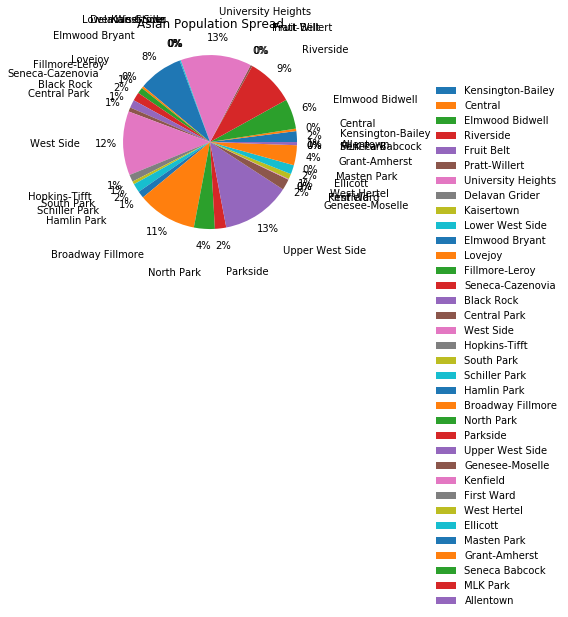

In [11]:
Buf_geo['Asian_pop'] = (Buf_geo['Total Persons'] * Buf_geo['Percent Asian'])/100
Buf_geo['Units_2000'] = (Buf_geo['Total Units in Structure']* Buf_geo['Percent Built 2000-2015'])/100
my_data = Buf_geo['Asian_pop']
my_labels = Buf_geo['Neighborhood']
plt.pie(my_data,labels=my_labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.5)
plt.title('Asian Population Spread')
plt.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
#plt.axis('equal')
plt.show()

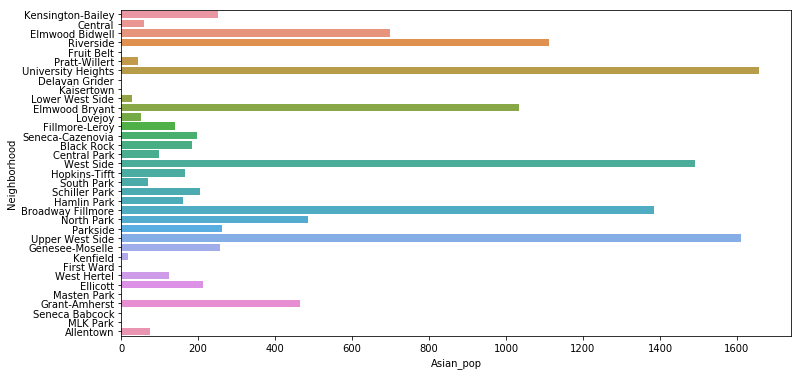

In [12]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(x=Buf_geo['Asian_pop'], y = Buf_geo['Neighborhood'],  
            data = Buf_geo,  
            ax=ax, ci=None)

Text(0.5, 0, 'Number of houses built after 2000')

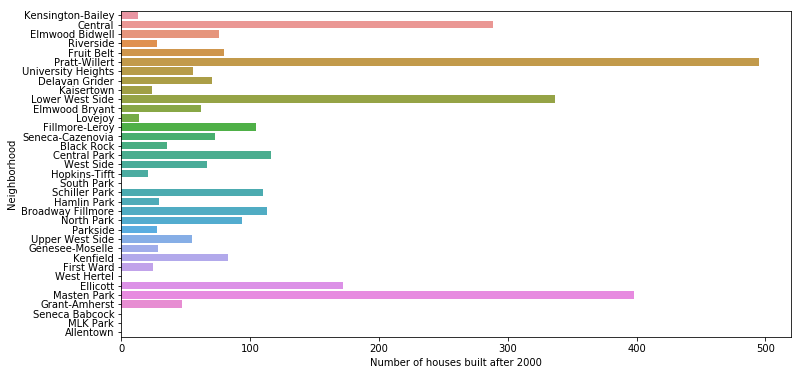

In [13]:
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(x=Buf_geo['Units_2000'], y = Buf_geo['Neighborhood'],  
            data = Buf_geo, ax=ax,
             ci=None)
ax.set_xlabel("Number of houses built after 2000")

Finding top 5 values for Asian Population, Median Income & Houses Built after 2000

In [14]:
Buf_geo.nlargest(5, ['Asian_pop'])['Neighborhood'] ### Top 5 Neighborhoods with Asian Population

6     University Heights
24       Upper West Side
16             West Side
21     Broadway Fillmore
3              Riverside
Name: Neighborhood, dtype: object

In [15]:
Buf_geo.nlargest(5, ['Median Income'])['Neighborhood'] ### Top 5 Neighborhoods by Median Income

15       Central Park
2     Elmwood Bidwell
18         South Park
1             Central
23           Parkside
Name: Neighborhood, dtype: object

In [16]:
Buf_geo.nlargest(5, ['Units_2000'])['Neighborhood'] ### Top 5 Neighborhoods with units built after 2000

5       Pratt-Willert
30        Masten Park
9     Lower West Side
1             Central
29           Ellicott
Name: Neighborhood, dtype: object

   ### Large number of Asian population live in University Heights followed by Upper West side. Where as the Pratt Willert and Masten Park got newer houses and none of these top  with Income. Central area has newer houses and higher median income

In [17]:

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_649a74950f1c4b0db92f74323e7bed40.get_object(Bucket='capstoneproject-donotdelete-pr-pc7gsdf0moggqt', Key='buffalo-neighborhoods.geojson')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 


In [18]:
# The code was removed by Watson Studio for sharing.

In [19]:
from ibm_botocore.client import Config
import ibm_boto3

cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])

In [20]:
cos.download_file(Bucket=credentials['BUCKET'],
                  Key='buffalo-neighborhoods.geojson',Filename='buf.geojson')

Creating credentials to access Foursquare API

In [21]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: IOCGLJ4A4STLADHSAYEXJRWN4GB1DNGFFIPE14BRX0A34WZM
CLIENT_SECRET:HUGG2ZDFVGCQVXVL5A5E1S32GVECXBAD2R3OE2H4OVO3DFNU


We will do a sample exploration of Venues for one of the Buffalo Neighborhoods - Elmwood Bidwell

In [22]:
Buf_geo.loc[2,'Neighborhood']

'Elmwood Bidwell'

In [23]:
neighborhood_latitude = Buf_geo.loc[2, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Buf_geo.loc[2, 'Longitude'] # neighborhood longitude value

neighborhood_name = Buf_geo.loc[2, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Elmwood Bidwell are 42.9245109, -78.8745306.


In [24]:
# create URL
radius = 500
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=IOCGLJ4A4STLADHSAYEXJRWN4GB1DNGFFIPE14BRX0A34WZM&client_secret=HUGG2ZDFVGCQVXVL5A5E1S32GVECXBAD2R3OE2H4OVO3DFNU&v=20180605&ll=42.9245109,-78.8745306&radius=500&limit=100'

In [25]:
results = requests.get(url).json()


In [26]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [27]:

url = "https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}".format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION )
response = requests.get(url)
cats = {}

def crawl(catlist=response.json()['response'], parents=[]):
    for c in catlist['categories']:
        cats[c['name']] = parents + [c['name']]
        crawl(c, parents + [c['name']])
        
crawl()

In [28]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Ashker's,Juice Bar,42.924430,-78.877080
1,Elmwood Village Farmers Market,Farmers Market,42.923304,-78.877181
2,Talking Leaves Books,Bookstore,42.923100,-78.877005
3,Rin Thai Bistro,Thai Restaurant,42.923905,-78.877287
4,Caffe Aroma,Café,42.923201,-78.876963


In [29]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))


29 venues were returned by Foursquare.


In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            cats[v['venue']['categories'][0]['name']][0] )for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                 'Venue Category Generalized']
    
    return(nearby_venues)

In [31]:
Buf_venues = getNearbyVenues(names=Buf_geo['Neighborhood'],
                                   latitudes=Buf_geo['Latitude'],
                                   longitudes=Buf_geo['Longitude'])

Kensington-Bailey
Central
Elmwood Bidwell
Riverside
Fruit Belt
Pratt-Willert
University Heights
Delavan Grider
Kaisertown
Lower West Side
Elmwood Bryant
Lovejoy
Fillmore-Leroy
Seneca-Cazenovia
Black Rock
Central Park
West Side
Hopkins-Tifft
South Park
Schiller Park
Hamlin Park
Broadway Fillmore
North Park
Parkside
Upper West Side
Genesee-Moselle
Kenfield
First Ward
West Hertel
Ellicott
Masten Park
Grant-Amherst
Seneca Babcock
MLK Park
Allentown


In [32]:
print(Buf_venues.shape)
Buf_venues.head()

(373, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Category Generalized
0,Kensington-Bailey,42.939776,-78.809881,Dollar General,42.938669,-78.813275,Discount Store,Shop & Service
1,Kensington-Bailey,42.939776,-78.809881,Bailey Jewelry,42.939295,-78.813772,Jewelry Store,Shop & Service
2,Kensington-Bailey,42.939776,-78.809881,Shepherd's Liquor,42.941281,-78.813280,Liquor Store,Shop & Service
3,Kensington-Bailey,42.939776,-78.809881,Captain Of The Sea,42.937445,-78.813965,Seafood Restaurant,Food
4,Kensington-Bailey,42.939776,-78.809881,Tomatoes Pizza,42.941542,-78.804320,Pizza Place,Food


In [33]:
Buf_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Category Generalized
Neighborhood,,,,,,,
Allentown,49,49,49,49,49,49,49
Black Rock,14,14,14,14,14,14,14
Broadway Fillmore,14,14,14,14,14,14,14
Central,26,26,26,26,26,26,26
Central Park,5,5,5,5,5,5,5
Delavan Grider,5,5,5,5,5,5,5
Ellicott,8,8,8,8,8,8,8
Elmwood Bidwell,29,29,29,29,29,29,29
Elmwood Bryant,19,19,19,19,19,19,19


In [34]:
print('There are {} uniques categories.'.format(len(Buf_venues['Venue Category'].unique())))


There are 142 uniques categories.


Create One hot coding 

In [35]:
# one hot encoding
Buf_onehot = pd.get_dummies(Buf_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Buf_onehot['Neighborhood'] = Buf_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Buf_onehot.columns[-1]] + list(Buf_onehot.columns[:-1])
Buf_onehot = Buf_onehot[fixed_columns]

Buf_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Antique Shop,Art Gallery,Art Museum,Auto Garage,Auto Workshop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beer Bar,Beer Store,Boat Rental,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Duty-free Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Farmers Market,Fast Food Restaurant,Food,Food Truck,Frame Store,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Harbor / Marina,Health & Beauty Service,History Museum,Hockey Arena,Hockey Rink,Home Service,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Liquor Store,Lounge,Market,Massage Studio,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Museum,Music Store,Music Venue,New American Restaurant,Office,Outdoor Sculpture,Paintball Field,Park,Performing Arts Venue,Pet Store,Pharmacy,Piercing Parlor,Pizza Place,Playground,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,Rock Club,Salad Place,Sandwich Place,Sausage Shop,Scenic Lookout,Seafood Restaurant,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Southern / Soul Food Restaurant,Souvenir Shop,Sporting Goods Shop,Sports Bar,Supermarket,Sushi Restaurant,Taco Place,Thai Restaurant,Theater,Thrift / Vintage Store,Tour Provider,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar
0,Kensington-Bailey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Kensington-Bailey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Kensington-Bailey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Kensington-Bailey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Kensington-Bailey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
Buf_onehot.shape

(373, 143)

In [37]:
Buf_grouped = Buf_onehot.groupby('Neighborhood').mean().reset_index()
Buf_grouped.head()

,Neighborhood,African Restaurant,American Restaurant,Antique Shop,Art Gallery,Art Museum,Auto Garage,Auto Workshop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beer Bar,Beer Store,Boat Rental,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Duty-free Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Farmers Market,Fast Food Restaurant,Food,Food Truck,Frame Store,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Harbor / Marina,Health & Beauty Service,History Museum,Hockey Arena,Hockey Rink,Home Service,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Liquor Store,Lounge,Market,Massage Studio,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Museum,Music Store,Music Venue,New American Restaurant,Office,Outdoor Sculpture,Paintball Field,Park,Performing Arts Venue,Pet Store,Pharmacy,Piercing Parlor,Pizza Place,Playground,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,Rock Club,Salad Place,Sandwich Place,Sausage Shop,Scenic Lookout,Seafood Restaurant,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Southern / Soul Food Restaurant,Souvenir Shop,Sporting Goods Shop,Sports Bar,Supermarket,Sushi Restaurant,Taco Place,Thai Restaurant,Theater,Thrift / Vintage Store,Tour Provider,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar
0,Allentown,0.0,0.061224,0.0,0.0,0.000000,0.0,0.0,0.020408,0.000000,0.000000,0.122449,0.0,0.020408,0.0,0.0,0.0,0.0,0.020408,0.000000,0.020408,0.000000,0.020408,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020408,0.061224,0.000000,0.0,0.0,0.020408,0.0,0.000000,0.0,0.020408,0.0,0.020408,0.000000,0.0,0.000000,0.000000,0.040816,0.0,0.0,0.0,0.000000,0.020408,0.020408,0.0,0.0,0.0,0.0,0.0,0.020408,0.0,0.0,0.0,0.061224,0.0,0.000000,0.020408,0.020408,0.0,0.000000,0.0,0.020408,0.000000,0.000000,0.0,0.000000,0.061224,0.0,0.0,0.0,0.000000,0.040816,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.020408,0.0,0.040816,0.000000,0.0,0.000000,0.0,0.0,0.020408,0.0,0.000000,0.0,0.000000,0.020408,0.0,0.000000,0.020408,0.000000,0.0,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061224,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.020408,0.0,0.020408
1,Black Rock,0.0,0.000000,0.0,0.0,0.071429,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.071429,0.0,0.000000,0.0,0.000000,0.142857,0.0,0.000000,0.071429,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.071429,0.000000,0.071429,0.0,0.071429,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.071429,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.071429,0.000000,0.071429,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.071429,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,Broadway Fillmore,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.071429,0.071429,0.071429,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [38]:
num_top_venues = 5

for hood in Buf_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Buf_grouped[Buf_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allentown----
            venue  freq
0             Bar  0.12
1         Gay Bar  0.06
2     Coffee Shop  0.06
3  Sandwich Place  0.06
4           Hotel  0.06


----Black Rock----
                venue  freq
0       Deli / Bodega  0.14
1         Pizza Place  0.07
2     Thai Restaurant  0.07
3      Discount Store  0.07
4  Seafood Restaurant  0.07


----Broadway Fillmore----
               venue  freq
0      Hot Dog Joint  0.07
1                Bar  0.07
2               Park  0.07
3     Discount Store  0.07
4  Electronics Store  0.07


----Central----
                 venue  freq
0         Hockey Arena  0.12
1                Hotel  0.08
2  American Restaurant  0.08
3                  Bar  0.08
4               Museum  0.08


----Central Park----
            venue  freq
0    Intersection   0.2
1     Coffee Shop   0.2
2    Liquor Store   0.2
3            Park   0.2
4  Ice Cream Shop   0.2


----Delavan Grider----
                  venue  freq
0     Convenience Store   0.2
1        Discou

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Buf_grouped['Neighborhood']

for ind in np.arange(Buf_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Buf_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allentown,Bar,Coffee Shop,Hotel,Sandwich Place,Gay Bar,American Restaurant,Mexican Restaurant,Dive Bar,Italian Restaurant,Event Space
1,Black Rock,Deli / Bodega,Harbor / Marina,Seafood Restaurant,Gourmet Shop,Italian Restaurant,Discount Store,Convenience Store,Pharmacy,Pizza Place,Bus Station
2,Broadway Fillmore,Bowling Alley,Bank,Convenience Store,Pizza Place,Middle Eastern Restaurant,Market,Discount Store,Electronics Store,Intersection,Hot Dog Joint
3,Central,Hockey Arena,American Restaurant,Museum,Lounge,Hotel,Bar,Comedy Club,Hockey Rink,Coffee Shop,Diner
4,Central Park,Liquor Store,Ice Cream Shop,Park,Coffee Shop,Intersection,Duty-free Shop,Donut Shop,Dive Bar,Discount Store,Diner


In [41]:
# set number of clusters
kclusters = 5

Buf_grouped_clustering = Buf_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Buf_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int32)

In [42]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Buf_merged = Buf_geo

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Buf_merged = Buf_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Buf_merged.head() # check the last columns!

,Neighborhood,Community,ID,Total Persons,Family Households,Percent Asian,Median Income,Latitude,Longitude,Total Units in Structure,Percent Built 2000-2015,New Georeferenced Column,Asian_pop,Units_2000,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kensington-Bailey,East,16,14098,3292,1.79,37240,42.939776,-78.809881,6492,0.20,"(42.93977645, -78.80988103)",252.3542,12.9840,1,Seafood Restaurant,Pizza Place,Jewelry Store,Discount Store,Liquor Store,Dessert Shop,Duty-free Shop,Donut Shop,Dive Bar,Diner
1,Central,Central,1,3458,663,1.68,54390,42.875966,-78.877250,1953,14.77,"(42.87596621, -78.87725)",58.0944,288.4581,1,Hockey Arena,American Restaurant,Museum,Lounge,Hotel,Bar,Comedy Club,Hockey Rink,Coffee Shop,Diner
2,Elmwood Bidwell,West,6,15804,2707,4.42,56150,42.924511,-78.874531,7143,1.06,"(42.9245109, -78.8745306)",698.5368,75.7158,1,Greek Restaurant,Italian Restaurant,Park,Farmers Market,Mexican Restaurant,Coffee Shop,Cycle Studio,Pet Store,Chinese Restaurant,Pizza Place
3,Riverside,North,11,10703,2378,10.39,21570,42.954950,-78.901916,4831,0.58,"(42.95494996, -78.90191565)",1112.0417,28.0198,1,Deli / Bodega,African Restaurant,Rock Club,Food Truck,Discount Store,Grocery Store,Chinese Restaurant,Pharmacy,Thai Restaurant,Thrift / Vintage Store
4,Fruit Belt,East,25,2296,523,0.00,25350,42.899160,-78.860605,1333,6.00,"(42.89916002, -78.86060503)",0.0000,79.9800,1,Hotel,Café,Donut Shop,Art Gallery,Coffee Shop,Cafeteria,Hot Dog Joint,Wine Bar,Dessert Shop,Dive Bar


In [43]:
Buf_merged.loc[Buf_merged['Cluster Labels'] == 0,  Buf_merged.columns[[0,1] + list(range(14, Buf_merged.shape[1]))]]

,Neighborhood,Community,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Pratt-Willert,East,0,Shopping Plaza,Convenience Store,Deli / Bodega,Duty-free Shop,Donut Shop,Dive Bar,Discount Store,Diner,Dessert Shop,Wine Bar
6,University Heights,North,0,Coffee Shop,Comic Shop,Convenience Store,Sandwich Place,Dessert Shop,Fast Food Restaurant,Cajun / Creole Restaurant,Ramen Restaurant,Clothing Store,Vegetarian / Vegan Restaurant
7,Delavan Grider,East,0,Coffee Shop,Discount Store,Sandwich Place,Convenience Store,Fast Food Restaurant,Deli / Bodega,Dive Bar,Diner,Dessert Shop,Dance Studio
9,Lower West Side,West,0,Liquor Store,Park,Gym,Coffee Shop,Sandwich Place,Pharmacy,Theater,Rental Car Location,Cycle Studio,Diner
15,Central Park,North,0,Liquor Store,Ice Cream Shop,Park,Coffee Shop,Intersection,Duty-free Shop,Donut Shop,Dive Bar,Discount Store,Diner
18,South Park,South,0,Pharmacy,Bookstore,Coffee Shop,Clothing Store,Park,Gay Bar,Gastropub,Concert Hall,Greek Restaurant,Construction & Landscaping
20,Hamlin Park,East,0,Construction & Landscaping,Convenience Store,Check Cashing Service,Wine Bar,Dessert Shop,Duty-free Shop,Donut Shop,Dive Bar,Discount Store,Diner


In [44]:
Buf_merged.loc[Buf_merged['Cluster Labels'] == 1,  Buf_merged.columns[[0,1] + list(range(14, Buf_merged.shape[1]))]]

,Neighborhood,Community,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kensington-Bailey,East,1,Seafood Restaurant,Pizza Place,Jewelry Store,Discount Store,Liquor Store,Dessert Shop,Duty-free Shop,Donut Shop,Dive Bar,Diner
1,Central,Central,1,Hockey Arena,American Restaurant,Museum,Lounge,Hotel,Bar,Comedy Club,Hockey Rink,Coffee Shop,Diner
2,Elmwood Bidwell,West,1,Greek Restaurant,Italian Restaurant,Park,Farmers Market,Mexican Restaurant,Coffee Shop,Cycle Studio,Pet Store,Chinese Restaurant,Pizza Place
3,Riverside,North,1,Deli / Bodega,African Restaurant,Rock Club,Food Truck,Discount Store,Grocery Store,Chinese Restaurant,Pharmacy,Thai Restaurant,Thrift / Vintage Store
4,Fruit Belt,East,1,Hotel,Café,Donut Shop,Art Gallery,Coffee Shop,Cafeteria,Hot Dog Joint,Wine Bar,Dessert Shop,Dive Bar
8,Kaisertown,South,1,Pizza Place,Park,Gas Station,Hot Dog Joint,Deli / Bodega,Café,Bar,Dance Studio,Dive Bar,Discount Store
10,Elmwood Bryant,West,1,Restaurant,Health & Beauty Service,Brewery,Salad Place,Kids Store,Liquor Store,Café,Beer Store,Pharmacy,Japanese Restaurant
11,Lovejoy,East,1,Deli / Bodega,Grocery Store,History Museum,Coffee Shop,Pizza Place,Auto Garage,Auto Workshop,Convenience Store,Gas Station,Intersection
12,Fillmore-Leroy,East,1,Snack Place,Discount Store,Indian Restaurant,Sports Bar,Wine Bar,Eastern European Restaurant,Donut Shop,Dive Bar,Diner,Dessert Shop
13,Seneca-Cazenovia,South,1,Coffee Shop,Pharmacy,Italian Restaurant,Supermarket,Playground,Pizza Place,Home Service,Thrift / Vintage Store,American Restaurant,Discount Store


In [45]:
Buf_merged.loc[Buf_merged['Cluster Labels'] == 2,  Buf_merged.columns[[0,1] + list(range(14, Buf_merged.shape[1]))]]

,Neighborhood,Community,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Masten Park,East,2,Supermarket,Chinese Restaurant,Discount Store,Wine Bar,Donut Shop,Dive Bar,Diner,Dessert Shop,Deli / Bodega,Dance Studio


In [46]:
Buf_merged.loc[Buf_merged['Cluster Labels'] == 3,  Buf_merged.columns[[0,1] + list(range(14, Buf_merged.shape[1]))]]

,Neighborhood,Community,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Hopkins-Tifft,South,3,Electronics Store,Boat or Ferry,Wine Bar,Duty-free Shop,Donut Shop,Dive Bar,Discount Store,Diner,Dessert Shop,Deli / Bodega


In [47]:
Buf_merged.loc[Buf_merged['Cluster Labels'] == 4,  Buf_merged.columns[[0,1] + list(range(14, Buf_merged.shape[1]))]]

,Neighborhood,Community,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Kenfield,East,4,Cosmetics Shop,Convenience Store,Wine Bar,Dessert Shop,Duty-free Shop,Donut Shop,Dive Bar,Discount Store,Diner,Dance Studio


Mapping the neighborhoods based on clusters

In [53]:
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

map_buf_c = folium.Map(location=[42.8864, -78.8784], zoom_start=10)

# add markers to map
for lat, lng, community, neighborhood,cluster in zip(Buf_merged['Latitude'], Buf_merged['Longitude'], Buf_merged['Community'], Buf_merged['Neighborhood'],Buf_merged['Cluster Labels']):
    label = '{}, {}, {}'.format(neighborhood,community,cluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7,
        parse_html=False).add_to(map_buf_c)  
    
map_buf_c